In [1]:
#DATA SOURCE:
#The dataset contains 2 folders - Infected - Uninfected
#And a total of 27,558 images.
#Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
#*Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. 

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [4]:
image_folder_path = 'C:\Sanjay\MyData\ML\DS_ML_Udemy\PortfolioProj\DeepLearning\CNN\MalariaCell_classification\cell_images'

In [5]:
os.listdir(image_folder_path)

['test', 'train']

In [7]:
image_train_folder_path = image_folder_path + '\\train'
image_train_folder_path

'C:\\Sanjay\\MyData\\ML\\DS_ML_Udemy\\PortfolioProj\\DeepLearning\\CNN\\MalariaCell_classification\\cell_images\\train'

In [8]:
image_test_folder_path = image_folder_path + '\\test'
image_test_folder_path

'C:\\Sanjay\\MyData\\ML\\DS_ML_Udemy\\PortfolioProj\\DeepLearning\\CNN\\MalariaCell_classification\\cell_images\\test'

In [9]:
os.listdir(image_train_folder_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(image_test_folder_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(image_train_folder_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [15]:
first_parasite_imageArray_in_train = imread(image_train_folder_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png')
first_parasite_imageArray_in_train

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

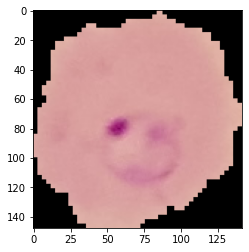

In [16]:
#first_parasite_image_in_train
plt.imshow(first_parasite_imageArray_in_train)

In [17]:
os.listdir(image_train_folder_path+'\\uninfected')

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [18]:
first_uninfected_imageArray_in_train = imread(image_train_folder_path+'\\uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png')
first_uninfected_imageArray_in_train

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

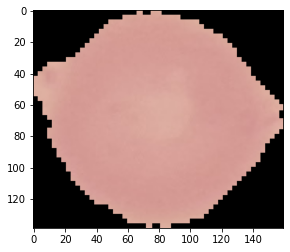

In [19]:
#first_uninfected_image_in_train
plt.imshow(first_uninfected_imageArray_in_train)

In [22]:
first_parasite_imageArray_in_train.shape

(148, 142, 3)

In [23]:
first_uninfected_imageArray_in_train.shape

(139, 160, 3)

In [24]:
#Above 2 statement says image are of separate sizes. CNN network cannot handle images of different sizes 

In [28]:
len(os.listdir(image_train_folder_path+'\\parasitized'))

12480

In [33]:
#let us see avg emage size

In [37]:
dim1 = []
dim2 = []

for img in os.listdir(image_train_folder_path+'\\parasitized'):
    file_ext = img.split(sep='.')[1]
    if (file_ext == 'jpeg' or file_ext == 'png'):
        image_array = imread(image_train_folder_path+'\\parasitized'+'\\'+img)
        dim1.append(image_array.shape[0])
        dim2.append(image_array.shape[1])

<Figure size 720x360 with 0 Axes>

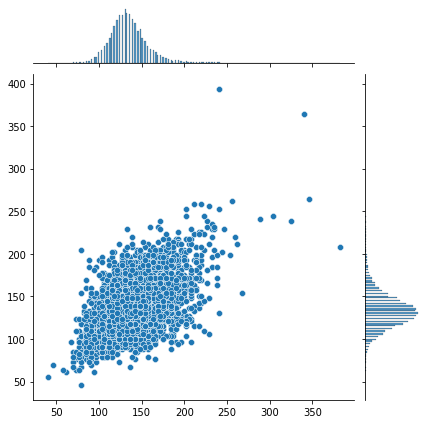

In [39]:
plt.figure(figsize=(10,5))
sns.jointplot(x=dim1, y=dim2)

In [42]:
np.mean(dim1)

134.360205144643

In [43]:
np.mean(dim2)

133.66447632021797